In [1]:
import numpy as np

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥ embedding 2 vectors ‡∏Ç‡∏ô‡∏≤‡∏î 128 ‡∏°‡∏¥‡∏ï‡∏¥
embedding_a = np.random.rand(128)
embedding_b = np.random.rand(128)

# 1. Euclidean Distance ‡πÄ‡∏ß‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏≠‡∏≤‡∏°‡∏≤‡∏•‡∏ö‡∏Å‡∏±‡∏ô - 
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# 2. Cosine Similarity  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì dot product ‡πÅ‡∏•‡πâ‡∏ß‡∏´‡∏≤‡∏£‡∏î‡πâ‡∏ß‡∏¢ norm ‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÄ‡∏ß‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# 3. Cosine Distance = 1 - Cosine Similarity
def cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)

print("Euclidean Distance:", euclidean_distance(embedding_a, embedding_b))
print("Cosine Similarity:", cosine_similarity(embedding_a, embedding_b))
print("Cosine Distance:", cosine_distance(embedding_a, embedding_b))


Euclidean Distance: 4.587368906030466
Cosine Similarity: 0.7457475723135644
Cosine Distance: 0.25425242768643563


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model 
import os
import cv2
from mtcnn.mtcnn import MTCNN
import tensorflow as tf
import matplotlib

#from tensorflow.keras import model


In [ ]:
from keras.models import load_model

model = load_model(r'D:\final_facenet\model\CA_076EA_078$$C078_E065.h5')
print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [4]:
def Nornal(image_path):
    """
    ‡πÇ‡∏´‡∏•‡∏î‡πÅ‡∏•‡∏∞‡∏õ‡∏£‡∏∞‡∏°‡∏ß‡∏•‡∏ú‡∏•‡∏†‡∏≤‡∏û‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢ - ‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç NaN
    """
        # ‡∏≠‡πà‡∏≤‡∏ô‡πÑ‡∏ü‡∏•‡πå
    image = tf.io.read_file(image_path)
        
        # Decode image
    image = tf.image.decode_image(image, channels=3)
        
        # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô float32 ‡∏Å‡πà‡∏≠‡∏ô resize
    image = tf.cast(image, tf.float32)
        
        # Resize
    image = tf.image.resize(image, [224, 224])
        
        # Normalize ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏õ‡∏•‡∏≠‡∏î‡∏†‡∏±‡∏¢
    image = (image * 255.0 - 127.5) / 128.0
        
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡πà‡∏≤‡∏ú‡∏¥‡∏î‡∏õ‡∏Å‡∏ï‡∏¥
    #image = tf.clip_by_value(image, 0.0, 1.0)
        #print(image)
        # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö NaN ‡∏´‡∏£‡∏∑‡∏≠ Inf
    #image = tf.where(tf.math.is_finite(image), image, tf.zeros_like(image))
        
        # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î shape
    image.set_shape((224, 224, 3))

    image = tf.expand_dims(image, axis=0) # ‡πÄ‡∏û‡∏¥‡πà‡∏° batch dimension
 
    return image


In [5]:
def Nornal1(image_array):
    """
    ‡∏£‡∏±‡∏ö NumPy image ‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡∏≥ preprocessing
    """
    image = tf.convert_to_tensor(image_array, dtype=tf.float32)

    # Resize
    image = tf.image.resize(image, [224, 224])

    # Normalize: scale to [-1, 1] ‡πÄ‡∏ä‡πà‡∏ô‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ö‡∏ó‡∏µ‡πà‡πÉ‡∏ä‡πâ‡πÉ‡∏ô FaceNet
    image = (image * 255.0 - 127.5) / 128.0

    # Set shape
    image.set_shape((224, 224, 3))

    # ‡πÄ‡∏û‡∏¥‡πà‡∏° batch dimension
    image = tf.expand_dims(image, axis=0)

    return image


In [6]:
def loadimagepng(image_path):
    try:
        img = tf.io.read_file(image_path)
        img = tf.image.decode_png(img, channels=3)
        img = tf.image.resize(img, (224, 224))
        img = tf.cast(img, tf.float32)
        img = img / 255.0  # Normalization
        img = tf.where(tf.math.is_finite(img), img, tf.zeros_like(img)) # ‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤ NaN ‡∏´‡∏£‡∏∑‡∏≠ Inf ‡∏î‡πâ‡∏ß‡∏¢ 0
        img = tf.clip_by_value(img, 0.0, 1.0)
        return img
    except:
        print(f"Error loading image {image_path}. Returning a zero tensor.")
        return tf.zeros((224, 224, 3), dtype=tf.float32)

In [7]:
def loadimage(image_path):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, [224, 224]) # Facenet ‡∏°‡∏±‡∏Å‡πÉ‡∏ä‡πâ 160x160 ‡∏´‡∏£‡∏∑‡∏≠ 224x224
        image = image / 255.0 # Normalize ‡πÄ‡∏õ‡πá‡∏ô 0-1
        image = tf.clip_by_value(image, 0.0, 1.0)
        image = tf.where(tf.math.is_finite(image), image, tf.zeros_like(image))
        image.set_shape((224, 224, 3)) # ‡∏Å‡∏≥‡∏´‡∏ô‡∏î Shape ‡πÉ‡∏´‡πâ‡∏ä‡∏±‡∏î‡πÄ‡∏à‡∏ô
        return image
    except Exception as e:
        print(f"‚ö†Ô∏è Error loading {image_path}: {e}")
        return tf.zeros((224, 224, 3), dtype=tf.float32) # ‡∏™‡πà‡∏á‡∏†‡∏≤‡∏û‡∏î‡∏≥‡∏Å‡∏•‡∏±‡∏ö‡πÑ‡∏õ

In [8]:
import matplotlib.pyplot as plt


In [9]:
print("Model loaded successfully.")

Model loaded successfully.


In [10]:
detector = MTCNN()

# load the input image and convert it to grayscale
#image = cv2.imread(r'C:\InceptionNet\T1\T1.jpg') #‡πÄ‡∏Å‡πá‡∏ö‡∏†‡∏≤‡∏û‡πÉ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ ,OpenCV ‡∏à‡∏∞‡πÇ‡∏´‡∏•‡∏î‡∏†‡∏≤‡∏û‡∏°‡∏≤‡πÉ‡∏ô‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö BGR (‡∏™‡∏µ‡∏ô‡πâ‡∏≥‡πÄ‡∏á‡∏¥‡∏ô, ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß, ‡πÅ‡∏î‡∏á) #‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏ï‡πâ‡∏ô‡∏â‡∏ö‡∏±‡∏ö 
def cap(image): 
    imageM = cv2.imread(image) 
    rgb_image = cv2.cvtColor(imageM, cv2.COLOR_BGR2RGB) #‡πÅ‡∏õ‡∏•‡∏á‡∏™‡∏µ‡∏†‡∏≤‡∏û‡∏à‡∏≤‡∏Å BGR ‡πÄ‡∏õ‡πá‡∏ô RGB
    results = detector.detect_faces(rgb_image) #box  confidence keypoints
    for face in results:
        x, y, width, height = face['box'] #face['box'] = [100, 150, 60, 60]  x = 100, y = 150, width = 60, height = 60
        x2, y2 = x + width, y + height #  2 ‡∏à‡∏∏‡∏î 
        """‡∏î‡∏∂‡∏á‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á‡∏Å‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤‡∏à‡∏≤‡∏Å dictionary ‡∏ó‡∏µ‡πà key box
        (x, y) ‡∏Ñ‡∏∑‡∏≠‡∏û‡∏¥‡∏Å‡∏±‡∏î‡∏°‡∏∏‡∏°‡∏ã‡πâ‡∏≤‡∏¢‡∏ö‡∏ô‡∏Ç‡∏≠‡∏á‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
        width ‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Å‡∏ß‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
        height ‡∏Ñ‡∏∑‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏π‡∏á‡∏Ç‡∏≠‡∏á‡∏Å‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤"""
        # ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≠‡∏ö‡∏™‡∏µ‡πÄ‡∏Ç‡∏µ‡∏¢‡∏ß‡∏£‡∏≠‡∏ö‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
        #cv2.rectangle(imageM, (x, y), (x2, y2), (0, 255, 0), 2) #cv2.rectangle(image, pt1, pt2, color, thickness)
        
        i = rgb_image[y:y2, x:x2]

        
        
        return i





In [19]:
Image1 = r'D:\final_facenet\Dataset\T1\f.jpg'
Image2 = r'D:\final_facenet\Dataset\t2\T1.jpg'
Image1c = cap(Image1)
Image2c = cap(Image2)
print("Image1c:", Image1c.shape)
print("Image1c:", Image2c.shape)

1/1 [==============================] - 0s 90ms/step
Image1c: (364, 312, 3)
Image1c: (319, 247, 3)


In [24]:
nor1 = Nornal1(Image1c)
em1 = model.predict(nor1)

nor2 = Nornal1(Image2c)
em2 = model.predict(nor2)


print("Embedding vector:", em1)
print("Embedding vector:", em2)

print(em1.shape)
print(em2.shape)
print(nor1.shape)
print(nor2.shape)

#print("Embedding vector:", em2)

1/1 [==============================] - 0s 60ms/step
Embedding vector: [[ 0.03281095  0.11439434  0.12510589 -0.11335942  0.06292529  0.00626869
  -0.09530554 -0.00245133  0.07948326  0.00191315  0.02356771  0.07297853
  -0.05347884  0.00336    -0.01117778  0.10235891 -0.07118771  0.00229836
  -0.0279574  -0.111145   -0.1256114   0.05167749 -0.02190211 -0.13978407
   0.03622589 -0.1120075   0.19444518  0.00848946 -0.0641242   0.0942153
  -0.01553095  0.2229738   0.02344895 -0.03496     0.09892997  0.08276176
   0.05625145  0.0739427   0.09905226 -0.065453    0.09112488 -0.07258228
   0.02557733  0.00907285 -0.01048791  0.08416244 -0.03114403  0.16086043
   0.05574096  0.13385282  0.05732825 -0.00598539  0.04571439 -0.04167604
   0.05547885  0.0330447  -0.14876539  0.03138171 -0.12627327 -0.03799503
  -0.02825542  0.07955667  0.1782842  -0.11176239  0.04258565 -0.03727843
  -0.07565692 -0.05408227 -0.07003129 -0.25790393 -0.02492788  0.111894
  -0.1104615  -0.08251926 -0.11361371 -0.0587

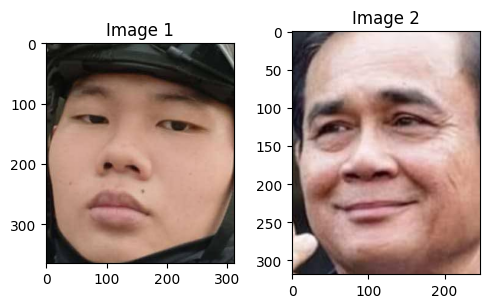

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))  # ‡∏Ç‡∏ô‡∏≤‡∏î‡∏´‡∏ô‡πâ‡∏≤‡∏ï‡πà‡∏≤‡∏á‡∏£‡∏ß‡∏°

# ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡πÅ‡∏£‡∏Å
plt.subplot(1, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 1
plt.imshow(Image1c)
plt.title("Image 1")
#plt.axis('off')

# ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á
plt.subplot(1, 2, 2)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 2
plt.imshow(Image2c)
plt.title("Image 2")

plt.tight_layout()
plt.show()


#image_np1 = Image1.numpy()[0]
#image_np2 = Image2.numpy()[0]


In [25]:
import numpy as np

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥ embedding 2 vectors ‡∏Ç‡∏ô‡∏≤‡∏î 128 ‡∏°‡∏¥‡∏ï‡∏¥
embedding_a = em1[0]  # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå 1 ‡∏°‡∏¥‡∏ï‡∏¥
embedding_b = em2[0]  # ‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå 1 ‡∏°‡∏¥‡∏ï‡∏¥

# 1. Euclidean Distance ‡πÄ‡∏ß‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏≠‡∏≤‡∏°‡∏≤‡∏•‡∏ö‡∏Å‡∏±‡∏ô - 
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

# 2. Cosine Similarity  # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì dot product ‡πÅ‡∏•‡πâ‡∏ß‡∏´‡∏≤‡∏£‡∏î‡πâ‡∏ß‡∏¢ norm ‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡πÄ‡∏ß‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå
def cosine_similarity(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

# 3. Cosine Distance = 1 - Cosine Similarity
def cosine_distance(a, b):
    return 1 - cosine_similarity(a, b)


eu_dist = euclidean_distance(embedding_a, embedding_b)
cos_sim = cosine_similarity(embedding_a, embedding_b)
cos_dist = cosine_distance(embedding_a, embedding_b)

print("Euclidean Distance:", eu_dist)
print("Cosine Similarity:", cos_sim)
print("Cosine Distance:", cos_dist)
 
# ‡πÄ‡∏û‡∏¥‡πà‡∏°‡πÄ‡∏á‡∏∑‡πà‡∏≠‡∏ô‡πÑ‡∏Ç‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡πÉ‡∏ö‡∏´‡∏ô‡πâ‡∏≤
if eu_dist < 0.2:
    print("‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô")
else:
    print("‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô")

Euclidean Distance: 0.042982005
Cosine Similarity: 0.9990762
Cosine Distance: 0.0009238123893737793
‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô


In [16]:
imaeda = cv2.imread(r'C:\InceptionNet\datasettest\train\359219\17062613.jpg')
imaedb = cv2.imread(r"C:\InceptionNet\Cropface\test\24\1414.jpg_face_1.jpg")

ima112 = cv2.imread(r"C:\InceptionNet\datasettest\train\24\1408.jpg")

In [18]:
import cv2
resized_img = cv2.resize(imaeda, (224, 224))
resized_imgC = cv2.resize(imaedb, (224, 224))
resized_img112 = cv2.resize(ima112, (224, 224))

print(resized_img.shape)
print(resized_imgC.shape)
print("1212*1212",resized_img112.shape)

(224, 224, 3)
(224, 224, 3)
1212*1212 (224, 224, 3)


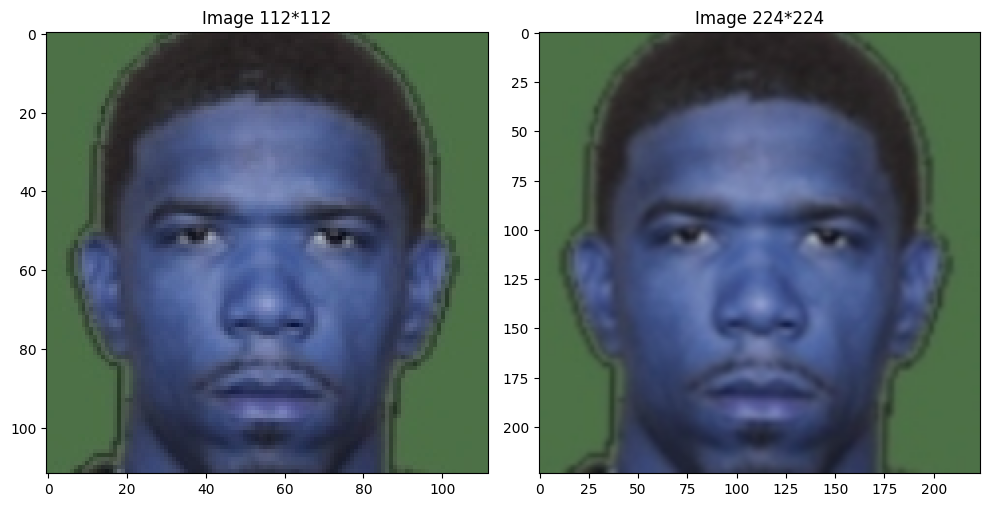

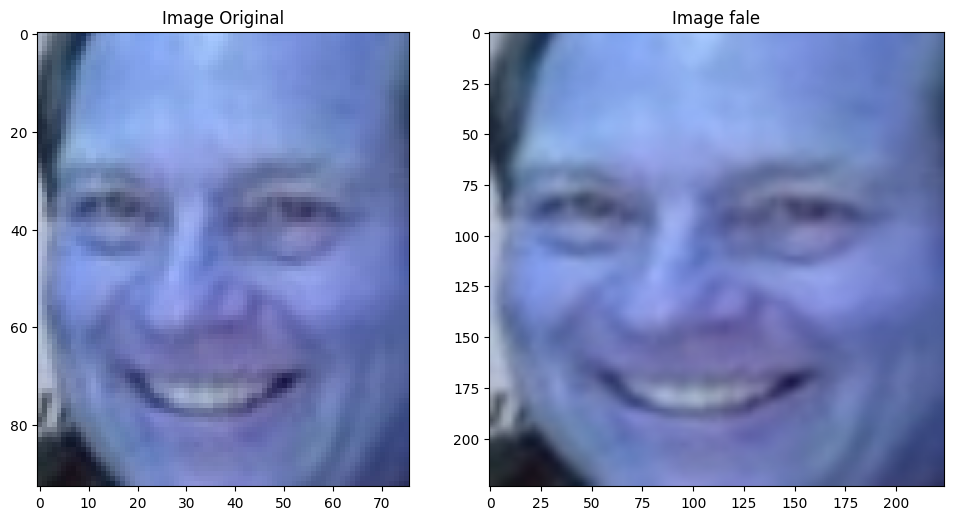

Text(0.5, 1.0, 'Image Original')

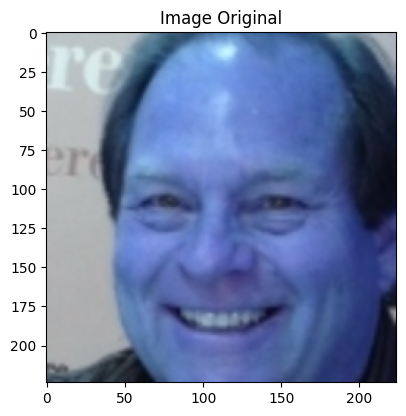

In [20]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 1
plt.imshow(imaeda)
plt.title("Image 112*112")
#plt.axis('off')

# ‡πÅ‡∏™‡∏î‡∏á‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á
plt.subplot(1, 2, 2)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 2
plt.imshow(resized_img)
plt.title("Image 224*224")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 2
plt.imshow(imaedb)
plt.title("Image Original")

plt.subplot(2, 2, 2)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 2
plt.imshow(resized_imgC)
plt.title("Image fale")

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)  # 1 ‡πÅ‡∏ñ‡∏ß 2 ‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå, ‡∏†‡∏≤‡∏û‡∏ó‡∏µ‡πà 2
plt.imshow(resized_img112)
plt.title("Image Original")



In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• FaceNet
model = tf.keras.models.load_model(r'C:\InceptionNet\inception+loss\modelA2.10.keras')

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float32") / 255.0
    return np.expand_dims(image, axis=0)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def load_embeddings_from_folder(folder_path):
    embeddings_dict = {}  # {class_name: [embedding1, embedding2, ...]}
    class_names = sorted(os.listdir(folder_path))
    for class_name in class_names:
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue
        embeddings = []
        for img_name in os.listdir(class_path):
            if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            emb = model.predict(img)
            embeddings.append(emb)
        embeddings_dict[class_name] = embeddings
    return embeddings_dict

# ‡πÇ‡∏´‡∏•‡∏î embeddings ‡∏ó‡∏±‡πâ‡∏á train ‡πÅ‡∏•‡∏∞ test
train_embeddings = load_embeddings_from_folder(r"C:\InceptionNet\mediamdata")
test_embeddings = load_embeddings_from_folder(r"C:\InceptionNet\matatestmediam")

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞ Euclidean ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏π‡πà‡∏Ç‡∏≠‡∏á train & test
threshold = 0.9
correct = 0
total = 0
distances = []

for class_name in test_embeddings:
    test_emb_list = test_embeddings[class_name]
    train_emb_list = train_embeddings.get(class_name, [])
    for idx_test, test_emb in enumerate(test_emb_list):
        matched = False
        for idx_train, train_emb in enumerate(train_emb_list):
            dist = euclidean_distance(test_emb, train_emb)
            distances.append(dist)
            total += 1
            is_same = dist < threshold
            print(f"[Class: {class_name}] Test image #{idx_test+1} vs Train image #{idx_train+1} --> Distance: {dist:.4f} --> {'‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô' if is_same else '‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô'}")
            if is_same:
                matched = True
        if matched:
            correct += 1

accuracy = correct / total if total > 0 else 0
print(f"‚úÖ Accuracy: {accuracy:.4f} ({correct}/{total})")


plt.figure(figsize=(8,4))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Distribution of Euclidean Distances")
plt.xlabel("Distance")
plt.ylabel("Number of pairs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 133ms/step


‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ‡πÇ‡∏´‡∏•‡∏î‡πÇ‡∏°‡πÄ‡∏î‡∏• FaceNet
model = tf.keras.models.load_model('/code/modelA2.10.keras')

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype("float32") / 255.0
    return np.expand_dims(image, axis=0)

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def load_embeddings_from_folder(folder_path, img_index=0):
    embeddings_dict = {}
    class_names = sorted(os.listdir(folder_path))
    total_classes = len(class_names)

    for idx, class_name in enumerate(class_names, start=1):
        class_path = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_path):
            continue

        print(f"\nüìÅ [Class {idx}/{total_classes}] {class_name}")

        img_files = sorted([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])

        # ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 2
        if len(img_files) < 2:
            print(f"  ‚ö†Ô∏è ‡∏Ç‡πâ‡∏≤‡∏°‡∏Ñ‡∏•‡∏≤‡∏™‡∏ô‡∏µ‡πâ ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏°‡∏µ‡∏£‡∏π‡∏õ‡πÅ‡∏Ñ‡πà {len(img_files)} ‡∏£‡∏π‡∏õ (‡∏ï‡πâ‡∏≠‡∏á‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ 2)")
            continue

        # ‚úÖ ‡∏ï‡∏£‡∏ß‡∏à‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏ï‡∏≤‡∏° index ‡∏ó‡∏µ‡πà‡∏Ç‡∏≠‡πÑ‡∏ß‡πâ
        if len(img_files) <= img_index:
            print(f"  ‚ùå ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏£‡∏π‡∏õ‡∏ó‡∏µ‡πà {img_index+1} ‡πÉ‡∏ô‡∏Ñ‡∏•‡∏≤‡∏™‡∏ô‡∏µ‡πâ")
            continue

        img_path = os.path.join(class_path, img_files[img_index])
        img = preprocess_image(img_path)
        emb = model.predict(img, verbose=0)
        embeddings_dict[class_name] = [emb]

        print(f"  ‚úÖ [{img_index+1}/{len(img_files)}] {img_files[img_index]} ‚Üí embedding ‡∏™‡∏£‡πâ‡∏≤‡∏á‡πÅ‡∏•‡πâ‡∏ß")

    print("\n‚úÖ ‡πÄ‡∏™‡∏£‡πá‡∏à‡∏™‡∏¥‡πâ‡∏ô‡∏Å‡∏≤‡∏£‡∏™‡∏£‡πâ‡∏≤‡∏á embeddings ‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î\n")
    return embeddings_dict



# ‡πÇ‡∏´‡∏•‡∏î embeddings ‡∏ó‡∏±‡πâ‡∏á train ‡πÅ‡∏•‡∏∞ test
train_embeddings = load_embeddings_from_folder("/data", img_index=0)  # ‡πÉ‡∏ä‡πâ‡∏£‡∏π‡∏õ‡πÅ‡∏£‡∏Å‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏≤‡∏™‡πÉ‡∏ô train
test_embeddings = load_embeddings_from_folder("/data", img_index=1)    # ‡πÉ‡∏ä‡πâ‡∏£‡∏π‡∏õ‡∏ó‡∏µ‡πà‡∏™‡∏≠‡∏á‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏≤‡∏™‡πÉ‡∏ô test

# ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Euclidean ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á embeddings ‡∏Ç‡∏≠‡∏á train & test
threshold = 0.9
correct = 0
total = 0
distances = []

for class_name in test_embeddings:
    test_emb_list = test_embeddings[class_name]
    train_emb_list = train_embeddings.get(class_name, [])

    if not test_emb_list or not train_emb_list:
        continue

    test_emb = test_emb_list[0]
    train_emb = train_emb_list[0]

    dist = euclidean_distance(test_emb, train_emb)
    distances.append(dist)
    total += 1
    is_same = dist < threshold

    print(f"[Class: {class_name}] Distance: {dist:.4f} --> {'‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô' if is_same else '‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô'}")

    if is_same:
        correct += 1

accuracy = correct / total if total > 0 else 0
print(f"\n‚úÖ Accuracy: {accuracy:.4f} ({correct}/{total})")

# ‡∏ß‡∏≤‡∏î‡∏Å‡∏£‡∏≤‡∏ü histogram
plt.figure(figsize=(8, 4))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
plt.title("Distribution of Euclidean Distances")
plt.xlabel("Distance")
plt.ylabel("Number of Pairs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


‡πÑ‡∏°‡πà‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô